# Import libraries 

In [ ]:
#### training the model after changing the images to grayscale
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import glob
import sys
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, concatenate, Dense, Flatten, Activation, Conv2DTranspose, BatchNormalization
from keras.models import Sequential, Model
from keras.applications import DenseNet201
from keras.optimizers import Adam,SGD
from keras.metrics import MeanIoU, Precision, Recall,Accuracy,BinaryAccuracy
from keras.losses import  BinaryFocalCrossentropy, BinaryCrossentropy
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pydot
import cv2

import random
print(tf.__version__)
print(sys.version)


# Image data processing and storing data in local directory

In [ ]:
image_path = glob.glob('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\val\\label\\val_mask\\*.png')
store = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\image_check\\'

for j,u in enumerate(image_path):
    image = cv2.imread(u)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.expand_dims(image,axis = 2)
    image = (np.where(image>0.5,1,0)*255).astype('float32')
    # paths = os.path.join(store,j)
    cv2.imwrite(store+f'{j}.png',image)
    # cv2.imshow('im',image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    print(image.shape)
    print(image,j)
    
path_0 = glob.glob('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\image_check\\*png') 
for f,r in enumerate(path_0): ###conversion of png to grayscale for training imahges
    image_1 = cv2.imread(r,cv2.IMREAD_GRAYSCALE)
    image_1 = np.expand_dims(image_1,axis = 2)
    print(image_1.shape)
    print(type(image_1))
    
    
    
image_path = glob.glob('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\train\\label\\train_label\\*.png')
store = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\preprocessed\\train\\label\\'
# os.makedirs(store)
for j,u in enumerate(image_path):
    image = cv2.imread(u)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.expand_dims(image,axis = 2)
    image = (np.where(image>0.5,1,0)*255).astype('float32')
    # paths = os.path.join(store,j)
    cv2.imwrite(store+f'{j}.png',image)
    # cv2.imshow('im',image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    print(image.shape,j)

    
path = glob.glob('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\image_check\\*png')
for d,e in enumerate(path):                       ###conversion of png to grayscale for validation dataset
    image_1 = cv2.imread(e,cv2.IMREAD_GRAYSCALE)
    image_1 = np.expand_dims(image_1,axis = 2)
    print(image_1.shape)
    print(type(image_1))   

# Read Filepaths

In [ ]:
filepath_4 = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\train\\image\\'
filepath_5 = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\train\\label\\'
filepath_6 = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\val\\image\\'
filepath_7 = 'C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\trail_membrane\\val\\label\\'

# Numerical data processing for Train and validation dataset

-

the numerical data is of form The 12 columns of data are (Q = Quality, hdop = Horizontal Degree of Precision, ns = nanoseconds, IMU = Inertial Measurement Unit). 

Note: The table below is an example of an image.

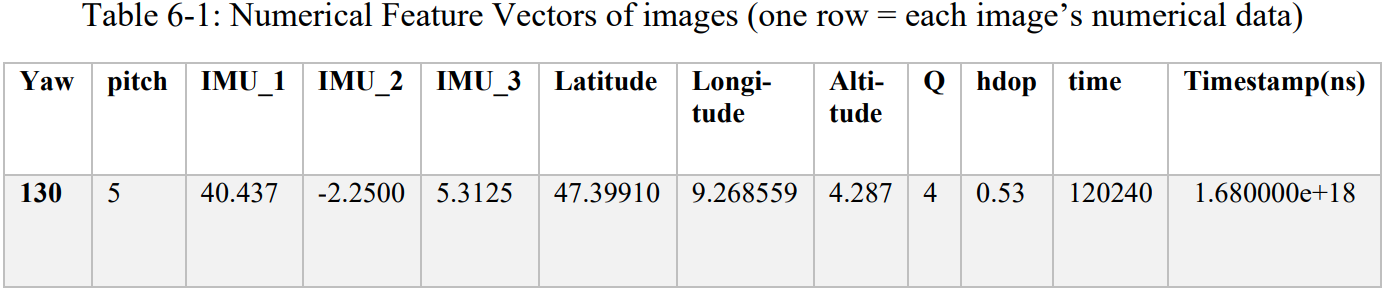


In [ ]:
num_data = pd.read_csv('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\concatenated_folder_1_folder_2.csv', header = None) ## read the dataset using pandas

def numerical(num_data_1): ## function definition
    
    num_data_2 = np.asarray(num_data_1)                                     #### covert csv to array
    print(num_data_2.shape)                                                 ####check the shape
    print(num_data_2)                                                       ###check dataset
    print(np.shape(num_data_2))                                             #### numpy array therefore np.shape
    scaling = MinMaxScaler()                                                    ####Minmaxscaler preprocessing
    data_processing_min_max = pd.DataFrame(scaling.fit_transform(num_data_2))  ########preprocessing
    print((data_processing_min_max))                                            ### check the preprocessing

    input_x = tf.convert_to_tensor(data_processing_min_max) ### converts to tensor to include the batch size

    input_x.shape ###check the shape

    input_x_1 = np.reshape(input_x,(-1,1,1,num_data_2.shape[1]))  #### reshaping for better computation for feature fusion
    print(input_x_1.shape[0], 'input_x_1') ##### check the shape
    print(type(input_x_1))  ###check the type

    x_input = np.tile(input_x_1, [1,16,16,1])   #[1,16,16,1] when resolution is (256,256)
    
    input_x_conv = x_input.astype(np.float32) ###conversion of the datatype
    
    input_x_new = input_x_conv[:,:,:,2:]    ####taking the values from 2nd column
    
    return input_x_new  ###return the new inputs to the model 

input_x_new = numerical(num_data)   ### function calling

print(input_x_new.shape, 'x_new')  ### check if the function is called






# Numerical dataset for validation

In [ ]:
###2nd for val_numerical_data read from another csv made
def data_frame_num_val(num_data_validation):  ### function definition
    
    
    num_data_validation = np.asarray(num_data_validation)                                #### covert csv to array for the validation set
    print(np.shape(num_data_validation))                                                 #### check the process
    scaling = MinMaxScaler()                                                             #####MINmax sclare processing
    data_processing_min_max_val = pd.DataFrame(scaling.fit_transform(num_data_validation))####preprocessing
    print((data_processing_min_max_val))                                                    ##### check preprocessing of the validation set
    
    input_x_val = tf.convert_to_tensor(data_processing_min_max_val)                         ### converts to tensor to include the batch size
    input_x_val.shape                                                                       ###check the shape
    
    input_x_val_num = np.tile(np.reshape(input_x_val,(-1,1,1,num_data_validation.shape[1])), [1,16,16,1])         #### reshaping for better computation for feature fusion
    
    # print(input_x_val_num.shape[0])                                                         ###check the shape
    
    #input_x_val_num = np.tile(input_x_val_num, [1,16,16,1])                                 #[1,16,16,1]) when (256,256) Resolution
    
    input_x_val_num_3 = (input_x_val_num).astype(np.float32)                                 #### conversion of the datatype to float values
    
    input_x_val_num_new = input_x_val_num_3[:,:,:,2:]                                       #### extraction of the columns from 2nd because we dont need height and image no.

    print(input_x_val_num_new.shape, 'Validation values reshaped to pixel wise which is at the bottom neck layer') ###### check the shape is it converted ?

    return input_x_val_num_new     #### return the dataset fed to the neural network



num_data_validation = pd.read_csv('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\main_all_data_folder_1_validation.csv', header = None) #### read the val data using pandas library   

input_x_val_num_new  = data_frame_num_val(num_data_validation)    #### function calling
print(input_x_val_num_new) ### check the function is called or not


# Read the images and image data augmentation

In [ ]:
data_generation_1 = ImageDataGenerator(rescale= 1/255.,width_shift_range = 0.1, height_shift_range = 0.1,shear_range =0.3, zoom_range = 0.3,
                                     horizontal_flip = True,
                                     fill_mode =  'nearest')      ##### 0.2,0.2

tf.random.set_seed(42)



def generation_processing_data_flow(data_generation_1):

       
   
    image_train = data_generation_1.flow_from_directory('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\preprocessed\\train\\image\\',
                                                    target_size =(256,256),
                                                        batch_size =1,
                                                        class_mode = None,
                                                        color_mode = 'rgb',
                                                        seed = 42)
    mask_train = data_generation_1.flow_from_directory('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\preprocessed\\train\\label\\', 
                                                        
                                                    target_size =(256,256),
                                                        batch_size =1,
                                                        class_mode = None,
                                                        color_mode = 'grayscale',
                                                        seed = 42) 

    image_val = data_generation_1.flow_from_directory('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\preprocessed\\val\\image\\',
                                                        
                                                    target_size =(256,256),
                                                        batch_size = 1,class_mode = None,
                                                        color_mode = 'rgb',
                                                        seed = 42)        
#seed of both the directories should be same.

    mask_val = data_generation_1.flow_from_directory('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\Attachments\\preprocessed\\val\\label\\', 
                                                    target_size =(256,256),
                                                        batch_size =1,
                                                        class_mode = None,
                                                        color_mode = 'grayscale',
                                                        seed = 42)
    return image_train,mask_train,image_val,mask_val                                                   

image_train,mask_train,image_val,mask_val = generation_processing_data_flow(data_generation_1)

# Image data handling for training and validation process

In [ ]:
x_images = []
x_mask_images = []
y_validation_images = []
y_mask_validation = []


for z in range(287):
    train_im = next(iter(image_train)).astype('float32')
    x_images.append(train_im[0])
print(train_im.shape)
print(np.shape(x_images))


for f in range(287):
    train_mas = next(iter(mask_train)).astype('float32')
    x_mask_images.append(train_mas[0])
print(train_mas.shape)
print(np.shape(x_mask_images))


for d in range(21):
    val_im = next(iter(image_val)).astype('float32')
    y_validation_images.append(val_im[0])
print(val_im.shape)
print(np.shape(y_validation_images))


for r in range(21):
    val_mas = next(iter(mask_val)).astype('float32')
    y_mask_validation.append(val_mas[0])

print(val_mas.shape)
print(np.shape(y_mask_validation))


# Handling the data for inputs tothe model

In [ ]:
tf.random.set_seed(42)

####zipping the files for training and validation for model.fit
def datas(x_images,x_mask_images,y_validation_images,y_mask_validation,
          input_x_new,input_x_val_num_new):
    x_images = np.array(x_images)                                                           ### list converted to arrays for better computation and conversion to tensor
    x_train = tf.data.Dataset.from_tensor_slices((x_images,input_x_new)).batch(3).repeat()  #### batch size 3 and repeat infinitely tensorflow API
    #print(len(x_train))
    print(type(x_train))

    x_mask_images = np.array(x_mask_images)                                             ### list converted to arrays for better computation and conversion to tensor
    x_mask_train = tf.data.Dataset.from_tensor_slices(x_mask_images).batch(3).repeat()  #### batch size 3 and repeat infinitely tensorflow API
    #print(len(x_mask_train))
    Train_data = tf.data.Dataset.zip((x_train,x_mask_train)) #### All data zipped to gether to train
    print(Train_data.element_spec)


    y_validation_images = np.array(y_validation_images)                                                  ### list converted to arrays for better computation and conversion to tensor
    y_val = tf.data.Dataset.from_tensor_slices((y_validation_images, input_x_val_num_new)).batch(3).repeat() #### batch size 3 and repeat infinitely tensorflow API
    #print(len(y_val))
    y_mask_validation = np.array(y_mask_validation)                                      ### list converted to arrays for better computation and conversion to tensor
    y_mask_val = tf.data.Dataset.from_tensor_slices(y_mask_validation).batch(3).repeat() #### batch size 3 and repeat infinitely tensorflow API
    #print(len(y_mask_val))

    validation_of_model = tf.data.Dataset.zip((y_val,y_mask_val)) #### All data zipped to gether to validate
    print(validation_of_model.element_spec)
    return Train_data, validation_of_model

Train_data, validation_of_model = datas(x_images,x_mask_images,y_validation_images,y_mask_validation,input_x_new,input_x_val_num_new)

# Figure plot and Visualizations

In [ ]:
# ####Figure Plotting

train_data = tf.data.Dataset.from_tensor_slices((x_images,x_mask_images)).take(4)
# figure,ax = plt.subplots(2,2,figsize = (10,10))
for image_train,image_mask in (train_data):
    figure = plt.figure()
    im = image_train
    ax = figure.add_subplot(1,2,1)
    ax.imshow(im, cmap = 'gray')
    plt.title('train_set_image')
    mas = image_mask
    ax1 = figure.add_subplot(1,2,2)
    ax1.imshow(mas, cmap = 'gray')
    plt.title('train_set_mask')

validation = tf.data.Dataset.from_tensor_slices((y_validation_images,y_mask_validation)).take(4)

for y,y_mask in (validation):
    figure = plt.figure()
    im = y
    ax = figure.add_subplot(1,2,1)
    ax.imshow(im, cmap = 'gray')
    plt.title('val_set_image')
    mas = y_mask
    ax1 = figure.add_subplot(1,2,2)
    ax1.imshow(mas, cmap = 'gray')
    plt.title('val_set_mask')
    

# Metrics to calculate the results

In [ ]:
##Introduced by Sudre et al. in Generalised Dice overlap as a deep learning loss function for highly unbalanced segmentations  

def loss_dice(y_true_labels, y_pred_labels):
    smoothing_non_zero = 1e-5
    intersection_pixels = tf.reduce_sum(y_true_labels *y_pred_labels)                      ###### dice_loss intersection pixels
    union_pixels = tf.reduce_sum(y_true_labels) + tf.reduce_sum(y_pred_labels)               ###### union of pixels
    dice_metric = (2.0 * intersection_pixels + smoothing_non_zero) / (union_pixels + smoothing_non_zero)  ### coefficient metrics calculation
    dice_loss = 1.0 - dice_metric
    return dice_loss

def metric_dice(y_true_labels, y_pred_labels):
    smoothing_non_zero = 1e-5
    intersection_pixels = tf.reduce_sum(y_true_labels * y_pred_labels)                        ###### dice_loss intersection pixels
    union_pixels = tf.reduce_sum(y_true_labels) + tf.reduce_sum(y_pred_labels)                  ###### union of pixels
    dice_metric = (2.0 * intersection_pixels + smoothing_non_zero) / (union_pixels  + smoothing_non_zero)     ### coefficient metrics calculation
    return dice_metric





# Model Architecture (Pretrained DenseNet201 + UNet)

In [ ]:
####Model Architechture
def convolutional(input_shape, filters):    
    
    convolutional_block = Conv2D(filters = filters, kernel_size = 3, 
                                 activation = 'relu',
                                 strides = (1,1), 
                                 padding  = 'same', 
                                 kernel_initializer  = 'he_normal')(input_shape) #Functional API'S
    
    convolutional_block_1 = BatchNormalization()(convolutional_block)
    
    convolutional_block_2 = Conv2D(filters = filters ,kernel_size = 3, 
                                 activation = 'relu',
                                 strides = (1,1), 
                                 padding  = 'same', 
                                 kernel_initializer  = 'he_normal')(convolutional_block_1)   #check which more kernel initializer we can add together using list
  
    return convolutional_block_2

def expansion(input_1,input_2,filters):
    
    conv_up_sample = Conv2DTranspose(filters = filters, kernel_size = (2,2), strides = (2,2),padding = 'same')(input_1)
    print(conv_up_sample)
    
    addition = concatenate([conv_up_sample, input_2]) # check here the input_2's size
    print(addition)
    
    addition = convolutional(addition,filters)
    
    return addition

input_shape_1 = (256, 256, 3)  #(256, 256, 3)
input_num_1 = (16,16,12)       #(32,32,12)


# Feature Fusion Image and Numerical features with model 
- Pretrained Densnet201 and Unet
- Encoder - Pre-trained Densenet201 (Transfer Learning)
- Extracted features from bottleneck layer is feature vectors of images (16,16,1792).
- Numerical Feature vectors are shaped as (16,16,12).
- externally fused at the last channel axis at the bottleneck layer, the size turns into (16,16,1804).
- The surge in the number of filters or a number of channels (last axis) with information from images as well as numerical feature vectors, can be observed.
- Decoder - Unet

In [ ]:

def densenet201(input_shape_1,input_num_1):
    input_shape = Input(input_shape_1)
    input_num = Input(input_num_1)
    skip = DenseNet201(include_top = False, weights = 'imagenet', input_tensor = input_shape)
    skip.summary()#only Convolutional Layers/Think that should we need classifier layers or not????
    #Skip Connections are skipped from the max_ool therefore the input size/2 and it will takes place 4 times for the contraction_unit.
    
    skip_1 = skip.get_layer('input_1').output 
    print(np.shape(skip_1))
    
    skip_2 = skip.get_layer('conv1/relu').output  
    print(np.shape(skip_2))                                         
    
    skip_3 = skip.get_layer('pool2_relu').output  
    print(np.shape(skip_3)) 
                                 
    
    skip_4 = skip.get_layer('pool3_relu').output                                     
    print(np.shape(skip_4))
    
    
    bottle_neck = skip.get_layer('pool4_relu').output  
    print(np.shape(bottle_neck),'bottle_neck_layer_shape')
    
    
    features = Flatten()(bottle_neck)
    print(features.shape, 'features_shape')
    
    input_expansion_2 = Flatten()(tf.reshape(input_num,[-1,16,16,12]))      #check should we reshape into batch_size 32*32*5 this is due to we are adding this in thebottle neck layer at the last axis or batch_size*1*5
    print(input_expansion_2.shape, ' Input_expansion_2')
    
    #### FUSING THE FEATURES IN
    feature = concatenate([features,input_expansion_2], axis = -1)
    print(feature, 'features_bottle_layer_z')
    

    feature_1 = tf.reshape(feature, [-1,16,16,1804]) ##### 1792+14    (16,16) when (256,256) rsolution
    print(feature_1)
  
    
    ## Decoder - Unet
    up_sample_it_1 = expansion(feature_1, skip_4,1804)    ## write bottle_neck=feature_1 512,256,128,64 #1804//2//4//8//16
    print(np.shape(up_sample_it_1), 'Up_samle_1')
    
    up_sample_it_2 = expansion(up_sample_it_1,skip_3,1804//2)
    print(np.shape(up_sample_it_2), 'Up_samle_2')
    
    up_sample_it_3 = expansion(up_sample_it_2, skip_2,1804//4)
    print(np.shape(up_sample_it_3), 'Up_samle_3')
    
    up_sample_it_4 = expansion(up_sample_it_3, skip_1,1804//8)
    print(np.shape(up_sample_it_4), 'Up_samle_4')
    
    
    convolutional_block_1 = Conv2D(filters = 1806//16 ,kernel_size = 3, 
                                 activation = 'relu',
                                 strides = (1,1), 
                                 padding  = 'same', 
                                 kernel_initializer  = 'glorot_uniform') (up_sample_it_4)
 
    
    Conv_2 = Conv2D(1, kernel_size =1,activation = 'sigmoid', padding  = 'same')(convolutional_block_1) # classes = 2 segmented glass or not......
    
    #model = Model(inputs = input_shape , outputs = Conv_2)
    model = Model(inputs =[input_shape, input_num] , outputs = Conv_2)
    
    return model



densenet_201_and_U_NET =  densenet201(input_shape_1,input_num_1)  
densenet_201_and_U_NET.summary() 
print(densenet_201_and_U_NET.inputs)


# Train and Validate the model 

In [ ]:
densenet_201_and_U_NET.compile(optimizer = Adam(lr = 0.0002), 
                               loss =loss_dice, 
                               metrics=[BinaryAccuracy(threshold=0.5),Precision(),Recall(),MeanIoU(num_classes = 2),metric_dice])




checkpoint = ModelCheckpoint('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\model_u_net_41.h5', verbose = 1, save_best_only = True)
callbacks = [EarlyStopping(patience = 10, monitor = 'val_loss'), checkpoint]    ##checking callbacks changes from val_mean_iou to val_loss
history_unet = densenet_201_and_U_NET.fit(Train_data,steps_per_epoch = 287//3, verbose = 1,validation_data = validation_of_model, callbacks = callbacks,validation_steps = 21//3, epochs = 40)

print(history_unet.history.keys())

losses = history_unet.history['loss']
validation_losses = history_unet.history['val_loss']
#epoch = (1, len(losses))
epochs = list(range(1, len(losses)+1))
plt.plot(epochs, losses,'y', label = 'train_loss')
plt.plot(epochs, validation_losses, 'b', label = 'val_loss')
plt.title('Train and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

mean_iou = history_unet.history['mean_io_u']
val_mean_iou = history_unet.history['val_mean_io_u']
epochs = list(range(1, len(losses)+1))
plt.plot(epochs, mean_iou,'y', label = 'mean_iou_')
plt.plot(epochs, val_mean_iou, 'b', label = 'val_mean_iou_')
plt.title('mean iou and Val iou')
plt.xlabel('Epoch')
plt.ylabel('iou')
plt.legend()
plt.show()

# Fine Tune the model

In [ ]:
##think from which layer to fine tune after image preprocessing from png to grayscale
for layer in densenet_201_and_U_NET.layers[40:]:
    layer.trainable = True
    
    

densenet_201_and_U_NET.compile(optimizer = Adam(lr = 0.0001), loss = loss_dice, metrics=[BinaryAccuracy(threshold=0.5),Precision(),Recall(),MeanIoU(num_classes = 2),metric_dice])
densenet_201_and_U_NET.summary()

checkpoint = ModelCheckpoint('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\model_u_net_42.h5', verbose = 1, save_best_only = True)

callbacks = [EarlyStopping(patience = 10, monitor = 'val_loss'), checkpoint]


history_unet = densenet_201_and_U_NET.fit(Train_data, steps_per_epoch = 287//3,  verbose = 1, callbacks = callbacks, validation_data = validation_of_model,  validation_steps = 21//3, epochs = 50)


losses = history_unet.history['loss']
validation_losses = history_unet.history['val_loss']
#epoch = (1, len(losses))
epochs = list(range(1, len(losses)+1))
plt.plot(epochs, losses,'y', label = 'train_loss')
plt.plot(epochs, validation_losses, 'b', label = 'val_loss')
plt.title('Train and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

mean_iou = history_unet.history['mean_io_u_1']
val_mean_iou = history_unet.history['val_mean_io_u_1']
epochs = list(range(1, len(losses)+1))
plt.plot(epochs, mean_iou,'y', label = 'mean_iou_')
plt.plot(epochs, val_mean_iou, 'b', label = 'val_mean_iou_')
plt.title('mean iou and Val iou')
plt.xlabel('Epoch')
plt.ylabel('iou')
plt.legend()
plt.show()

# Inference

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import keras.utils
from keras.models import load_model
import keras.losses
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Define the custom loss function
def dice_loss(y_true, y_pred):
    smooth = 1e-5
    intersection = keras.backend.sum(y_true * y_pred)
    union = keras.backend.sum(y_true) + keras.backend.sum(y_pred)
    dice_coef = (2.0 * intersection + smooth) / (union + smooth)
    return 1.0 - dice_coef

# Register the custom loss function
keras.losses.dice_loss = dice_loss


    
with keras.utils.custom_object_scope({'dice_loss': dice_loss}):
    model = load_model('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\model_u_net_27.h5')   #22

# Preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Adjust input_width and input_height to match your model
    image = image / 255.0  # Normalize pixel values to the range of 0 to 1
    return image

def preprocess_numbers():
    data_frame_1 = pd.read_csv('C:\\Users\\Shah\\Desktop\\labelme\\labelme-main\\examples\\semantic_segmentation\\data_not_to_be_used _folder_2_18_may\\discarded_test.csv',header = None)
    data_frame_test_1 = data_frame_1.iloc[5,2:]
    data_frame_test_1 = np.reshape(data_frame_test_1,(1,12))
    return data_frame_1,data_frame_test_1
data_frame_1,data_frame_test_1 = preprocess_numbers() 
print(data_frame_1)##### (26,5)  (rows,columns)
print(np.shape(data_frame_1)) 
print(data_frame_test_1)##### (26,5)  (rows,columns)
print(np.shape(data_frame_test_1)) 

input_x_test = tf.convert_to_tensor(data_frame_test_1) 
input_x_test.shape 

scaling = MinMaxScaler()
input_x_normal_test = pd.DataFrame(scaling.fit_transform(input_x_test))  ###columns = data_frame_1.iloc[3].values
print((input_x_normal_test.shape))
print((input_x_normal_test))
input_x_num = tf.convert_to_tensor(input_x_normal_test.values.reshape((-1,1,1,12))) 
print(input_x_num.shape)
input_num_test = np.tile(input_x_num, [1,16,16,1]).astype('float32')
print(input_num_test.shape)
    

# # Load and preprocess the image

image_path = 'C:\\Users\\Shah\\Desktop\\labelme\\labelme-main\\examples\\semantic_segmentation\\data_not_to_be_used _folder_2_18_may\\POS_055.bmp'

image = cv2.imread(image_path)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im = cv2.imwrite('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\test.jpg', image)
im_1 = cv2.imread('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\test.jpg')
print(im_1.shape)

preprocessed_image = preprocess_image(im_1)
print(preprocessed_image.shape)

# # Reshape the image to match the input shape expected by the model
input_image = np.expand_dims(preprocessed_image, axis=0)
print(input_image.shape)
print(input_num_test.shape)


inputs = [input_image,input_num_test]
# # Run the inference
predicted_masks = model.predict(inputs)
print(predicted_masks.shape)



# Postprocess the mask
threshold = 0.6  # Adjust this threshold based on your model's characteristics
predicted_masks = (predicted_masks > threshold).astype(np.uint8)
#plt.imshow(predicted_masks[0])

# # # Visualize the mask
mask = predicted_masks[0] * 255
mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
figure = plt.figure()
im = cv2.resize(im_1, (image.shape[1], image.shape[0]))
ax = figure.add_subplot(1,2,1)
ax.imshow(im, cmap = 'gray')

mas = mask
ax1 = figure.add_subplot(1,2,2)
ax1.imshow(mask, cmap = 'gray')
plt.figure('random_sets_test')

# Testing on more images

In [ ]:
###for loop testing data


import numpy as np
import cv2
import tensorflow as tf
import keras.utils
from keras.models import load_model
import keras.losses
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Define the custom loss function
def dice_loss(y_true, y_pred):
    smooth = 1e-5
    intersection = keras.backend.sum(y_true * y_pred)
    union = keras.backend.sum(y_true) + keras.backend.sum(y_pred)
    dice_coef = (2.0 * intersection + smooth) / (union + smooth)
    return 1.0 - dice_coef

# Register the custom loss function
keras.losses.dice_loss = dice_loss


    
with keras.utils.custom_object_scope({'dice_loss': dice_loss}):
    model = load_model('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\model_u_net_21.h5')   #22

# Preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Adjust input_width and input_height to match your model
    image = image / 255.0  # Normalize pixel values to the range of 0 to 1
    return image

values = []
def preprocess_numbers():
    data_frame_1 = pd.read_csv('C:\\Users\\Shah\\Desktop\\labelme\\labelme-main\\examples\\semantic_segmentation\\data_not_to_be_used _folder_2_18_may\\discarded_test.csv',header = None)
    return data_frame_1    
        #data_frame_test_1 = data_frame_1.iloc[i]
        #data_frame_test_1 = np.reshape(data_frame_test_1,(1,14))
        #return data_frame_1,data_frame_test_1
data_frame_1= preprocess_numbers() 
print(values)
print(np.shape(values))
 

input_x_normal_test = pd.DataFrame(data_frame_1)
print(input_x_normal_test)

scaling = MinMaxScaler()
input_x_normal_test= pd.DataFrame(scaling.fit_transform(input_x_normal_test))
print(input_x_normal_test)

input_x_num = tf.convert_to_tensor(input_x_normal_test.values.reshape((-1,1,1,14))) 
print(input_x_num.shape)
input_num_test = np.tile(input_x_num, [16,16,1]).astype('float32')
print(input_num_test.shape)
print(type(input_num_test))
print((input_num_test[0]).shape)

    
       

image_path = glob.glob('C:\\Users\\Shah\\Desktop\\labelme\\labelme-main\\examples\\semantic_segmentation\\data_not_to_be_used _folder_2_18_may\\*.bmp')

for u in image_path:


    image = cv2.imread(u)


    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im = cv2.imwrite('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\test.jpg', image)
    im_1 = cv2.imread('C:\\Users\\Shah\\OneDrive - IWT Wirtschaft und Technik GmbH\\test.jpg')
    print(im_1.shape)

    preprocessed_image = preprocess_image(im_1)
    print(preprocessed_image.shape)

# # Reshape the image to match the input shape expected by the model
    input_image = np.expand_dims(preprocessed_image, axis=0)
    print(input_image.shape)
    print(input_num_test.shape)

input_test = np.expand_dims(input_num_test, axis=0)
print(input_test.shape)

inputs = [input_image,input_num_test[0]]
print(inputs)
# # Run the inference
predicted_masks = model.predict(inputs)
print(predicted_masks.shape)

# plt.imshow(predicted_masks[0],cmap = 'gray')

# Postprocess the mask
threshold = 0.5  # Adjust this threshold based on your model's characteristics
predicted_masks = (predicted_masks > threshold).astype(np.uint8)
#plt.imshow(predicted_masks[0])

# # # Visualize the mask
mask = predicted_masks[0] * 255
mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
figure = plt.figure()
im = cv2.resize(im_1, (image.shape[1], image.shape[0]))
ax = figure.add_subplot(1,2,1)
ax.imshow(im, cmap = 'gray')

mas = mask
ax1 = figure.add_subplot(1,2,2)
ax1.imshow(mask, cmap = 'gray')
plt.figure('random_sets_test')
